 ## Problem statement  

With a dataset consisting of a no. of sessions of users along with certain attributes,We need to predict whether a session would end with shopping or not.  

## Dataset Dictionary(not complete)

** The data set consists of 12330 sessions, along with 18 attributes.

Each session belongs to a different user in a 1-year period.

~~ ATTRIBUTES 

**Administrative**: No. of adiministrative pages visted by the user in a session.

**Administrative Duration** : Time spent on the administrative pages by the user in a session.

**Informational** : No. of Informational pages visted by the user in a session.

**Informational Duration** : Time spent on the Informational pages by the user in a session.

**Product Related** : No. of Product Related pages visted by the user in a session.

**Product Related Duration** :Time spent on the Product related pages by the user in a session.

**Bounce Rate**: Refers to the percentage of visitors who enter the site from that page and then left without triggering any other                      requests during that session. 

**Exit Rate** :The percentage of pageveiws that ended up on that page in a session.

**



### IMPORTING THE NECESSARY LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv(r'C:\0_data\data sets\online_shoppers_intention.csv')
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### EDA

In [3]:
data.shape

(12330, 18)

In [4]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [6]:
data["Month"].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [7]:
data["VisitorType"].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [8]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


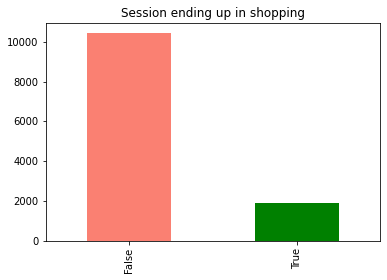

In [9]:
#  to know how many sessions ended up in a transaction and how many did not, in the data set;
ax=data["Revenue"].value_counts().plot(kind="bar",
                                    color = ["salmon","green"]);
plt.title("Session ending up in shopping");

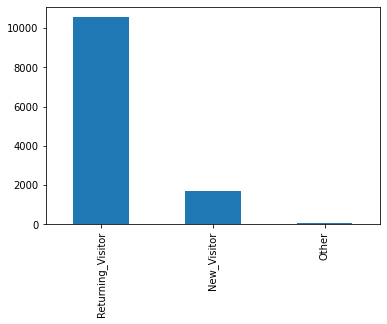

In [10]:
#To know what kinds user were involved in the data set
user_plot=data["VisitorType"].value_counts().plot(kind="bar")

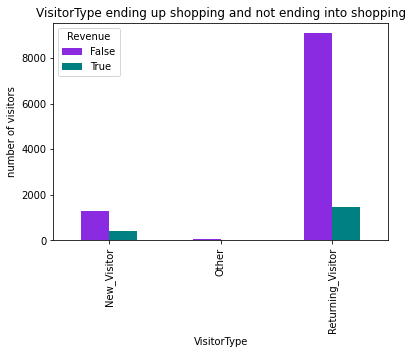

In [11]:
# Kind of visitors that ended up having transaction or did not end up doing so;
pd.crosstab(data.VisitorType,data.Revenue).plot(kind="bar",
                                              color = ["blueviolet","teal"]);

plt.title("VisitorType ending up shopping and not ending into shopping")
plt.ylabel("number of visitors");


In [12]:
# how many sessions happened on weekends which did not ?
data["Weekend"].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

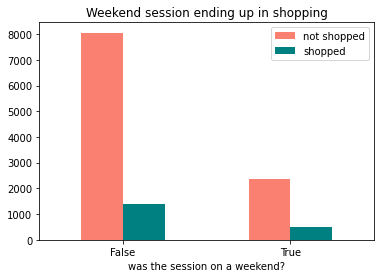

In [13]:
pd.crosstab(data.Weekend,data.Revenue).plot(kind="bar",
                                           color = ["salmon","teal"]);

plt.title("Weekend session ending up in shopping");
plt.xlabel("was the session on a weekend?")
plt.legend(["not shopped","shopped"])
plt.xticks(rotation=False)


In [14]:
# any missing value?
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## Data Prepocessing

#### converting the non numeric columns into numerical ones


In [15]:
# The boolean columns
data["Weekend"]=data["Weekend"].astype(int)
data["Revenue"]=data["Revenue"].astype(int)


In [16]:
# The Categorial columns
#  we will be changing the Visitortype and the Month coulmns to Dummy columns by using `get_dummies` 
datacopy=pd.get_dummies(data,columns=["VisitorType","Month"],drop_first=True)

####  Converting the Columns Browser,Region,TrafficType,OperatingSystems in a form so that  they are the nominal values(i.e the numbers representing a category in a column,do not have a mathematical significance) 

In [17]:
datacopy.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'VisitorType_Other', 'VisitorType_Returning_Visitor',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep'],
      dtype='object')

In [18]:
datacopy=pd.get_dummies(datacopy,columns = ['OperatingSystems', 'Browser', 'Region', 'TrafficType'],drop_first=True)


## Modelling

In [19]:
#  Importing the models and evaluation metric tools 

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [20]:

# mentioning the feature and label
X=datacopy.drop("Revenue",axis=1)
Y=datacopy["Revenue"]

# setting the random state
np.random.seed(42)

# splitting the data into testing and training data sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [21]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((9864, 68), (2466, 68), (9864,), (2466,))

In [22]:
# since we will be using four different models, 
# lets create a function to see which model model performed well for baseline model and then we can develop from that conclusion to do hyperparameter tuning

# lets create a model dictionary so that our function can iterate over that
model={"logisticRegression":LogisticRegression(),
       "KNeighbourClassifier":KNeighborsClassifier(),
       "RandomForestClassifier": RandomForestClassifier(),
       "NaiveBayesClassifier" : GaussianNB()}

def fit_score(model,X_train,X_test,Y_train,Y_test):
    '''
    this function would take up a model and fit the training data into, after which it will evaluate
    using a testing data
    '''
#     setting up random seed
    np.random.seed(42)
    
    model_score={}
    
#     to loop through the dictionary 
    for modelname, model in model.items():
#       fit the model
        model.fit(X_train,Y_train)
    
#       evaluate the model
        model_score[modelname] = (model.score(X_test,Y_test) * 100)
    
#       return model
    return model_score 


In [23]:
model_scores= fit_score(model,X_train,X_test,Y_train,Y_test)

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
model_scores

{'logisticRegression': 86.94241686942416,
 'KNeighbourClassifier': 85.03649635036497,
 'RandomForestClassifier': 89.41605839416059,
 'NaiveBayesClassifier': 75.62854825628548}

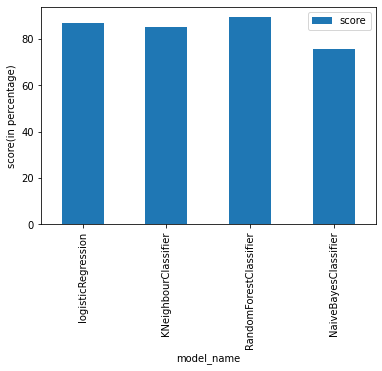

In [25]:
# so we can visualise the scores of our baseine model
baseline_model=pd.DataFrame(model_scores,index=["score"]).T
baseline_model.plot(kind="bar")
plt.xlabel("model_name")
plt.ylabel("score(in percentage)");

### Hyperparameter Tuning

In [26]:
# from our above baseline model comparison, it was evident that the Naive bayes Classifier did not score well as compared to the 
#other three. We will try and tune the remaining model so that they could go on to prove to be best models

#  Tuning the models using GridsearchCV
#   creating the paarmeter grid to loop through

# hyperparameter grid for LogisticRegression

lr_grid = {"penalty":["l1","l2"],
           "solver" :["liblinear"],
           "C" : [0.1, 100, 1000]}

# hyperparameter grid for KneighborsClassifier
neighbors= np.arange(1,21)
knc_grid = {"n_neighbors": neighbors,
            "leaf_size" : [25,30]}

# hyperparameter grid for Randomforest Classifier
rfc_grid = {"n_estimators" : np.arange(10,250,50),
            "max_depth" : [None,2,5,10],
            "min_samples_split" : np.arange(2,20,2)}

In [27]:
# for the logistic Regression model

lr_gs= GridSearchCV(LogisticRegression(),
                    param_grid = lr_grid,
                    cv = 5,
                    verbose =True)

lr_gs.fit(X_train,Y_train)
lr_gs.score(X_test,Y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


0.8706407137064072

In [28]:
lr_gs.best_params_

{'C': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

In [29]:
# for Ramdomforestcassifier
rfc_gs= GridSearchCV(RandomForestClassifier(),
                    param_grid = rfc_grid,
                    cv=5,
                    verbose = True)

rfc_gs.fit(X_train,Y_train)
rfc_gs.score(X_test,Y_test)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


0.8921330089213301

In [30]:
#  for KNeighborsClassifier
knc_gs = GridSearchCV(KNeighborsClassifier(),
                      param_grid = knc_grid,
                      cv= 5,
                      verbose = True)

knc_gs.fit(X_train,Y_train)
knc_gs.score(X_test,Y_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


0.8560421735604218

In [31]:
#  for best parameters for randomforestclassifier 
rfc_gs.best_params_

{'max_depth': None, 'min_samples_split': 8, 'n_estimators': 60}

In [32]:
# and KneighborsClassifier
knc_gs.best_params_

{'leaf_size': 25, 'n_neighbors': 8}

In [33]:
# from the above tuning it was found that kneighbors classifier and random forest classifier showed some improvement
#  and between the two the Random Forest Classifier gave the highest accuracies.


### EVALUATION

In [34]:
# lets instantiate the best model obtained throughGridSearchCV

rfc_best= RandomForestClassifier(max_depth= None,min_samples_split= 6,n_estimators= 160)
# fitting the model
rfc_best.fit(X_train,Y_train)

RandomForestClassifier(min_samples_split=6, n_estimators=160)

In [35]:
# prediction:
Y_preds=rfc_best.predict(X_test)
Y_preds.shape

(2466,)

In [36]:
# Evaluating the model using evaluation metrics
# confusion metrics
# this shows where our model got confused
confusion_matrix(Y_test,Y_preds)

array([[1990,   65],
       [ 203,  208]], dtype=int64)

In [37]:
# evaluating using the classification Report
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2055
           1       0.76      0.51      0.61       411

    accuracy                           0.89      2466
   macro avg       0.83      0.74      0.77      2466
weighted avg       0.88      0.89      0.88      2466



In [38]:
#  saving the model 
import pickle

pickle.dump(rfc_best,open("online_shopping_model.pkl","wb"))

In [39]:
# loading the model 
best_model = pickle.load(open("online_shopping_model.pkl","rb"))